# TREE BASED ML MODELS

In [1]:
#Classification Trees
df <- read.csv("default.csv")

str(df)

'data.frame':	1000 obs. of  17 variables:
 $ ï..checking_balance : Factor w/ 4 levels "< 0 DM","> 200 DM",..: 1 3 4 1 1 4 4 3 4 3 ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : Factor w/ 5 levels "critical","good",..: 1 2 1 2 4 2 2 2 2 1 ...
 $ purpose             : Factor w/ 6 levels "business","car",..: 5 5 4 5 2 4 5 2 5 2 ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : Factor w/ 5 levels "< 100 DM","> 1000 DM",..: 5 1 1 1 1 5 4 1 2 1 ...
 $ employment_duration : Factor w/ 5 levels "< 1 year","> 7 years",..: 2 3 4 4 3 3 2 3 4 5 ...
 $ percent_of_income   : int  4 2 2 2 3 2 3 2 2 4 ...
 $ years_at_residence  : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ...
 $ other_credit        : Factor w/ 3 levels "bank","none",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ housing             : Factor w/ 3 levels "other","own",..: 2 2 2 1 1 1 2 3 2 2 ...
 $ exi

In [2]:
# Make decision tree using RPART Package
install.packages("rpart")
library(rpart)
install.packages("rpart.plot")
library(rpart.plot)


Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\rpart\libs\x64\rpart.dll to C:\Users\blake\Documents\R\win-library\3.6\rpart\libs\x64\rpart.dll: Permission denied"Warning message:
"restored 'rpart'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\Rtmpyykm62\downloaded_packages


Warning message:
"package 'rpart' was built under R version 3.6.3"Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\Rtmpyykm62\downloaded_packages


Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

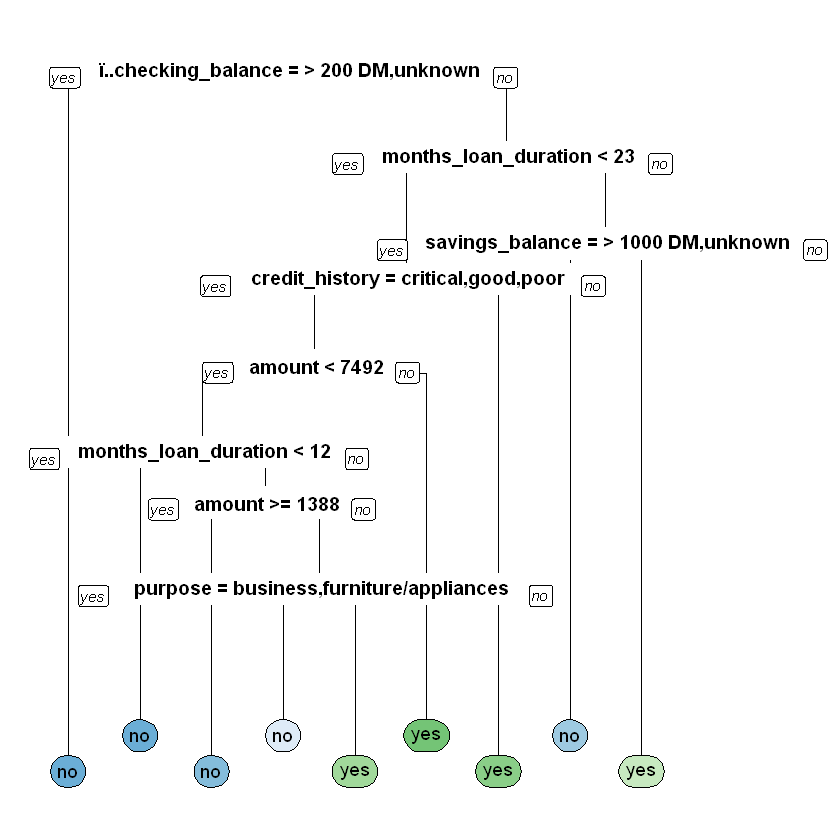

In [3]:
# Create the model
credit_model <- rpart(formula = default ~ ., 
                      data = df, 
                      method = "class")

# Display the results 
rpart.plot(x = credit_model, yesno = 2, type = 0, extra = 0)


In [4]:
# Train/Test Split
n <- nrow(df)

# number of rows for the training set 80% 
n_train <- round(0.80 * n)

# Set random seed
set.seed(55)

# Create a vector of indices which is 80% randome sample
train_indicies <- sample(1:n, n_train)

# subset the data to train indices only
train_df <- df[train_indicies, ]

# subset for test set
test_df <- df[-train_indicies,]

In [5]:
# Train the model to predict "will wait" bonary response
credit_model <- rpart(formula = default ~ ., 
                      data = train_df, 
                      method = "class")

# Look at the model output                      
print(credit_model)


n= 800 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 800 239 no (0.70125000 0.29875000)  
    2) ï..checking_balance=> 200 DM,unknown 367  41 no (0.88828338 0.11171662) *
    3) ï..checking_balance=< 0 DM,1 - 200 DM 433 198 no (0.54272517 0.45727483)  
      6) months_loan_duration< 22.5 246  87 no (0.64634146 0.35365854)  
       12) credit_history=critical,good,poor 221  69 no (0.68778281 0.31221719)  
         24) months_loan_duration< 11.5 61  11 no (0.81967213 0.18032787)  
           48) age>=24.5 54   6 no (0.88888889 0.11111111) *
           49) age< 24.5 7   2 yes (0.28571429 0.71428571) *
         25) months_loan_duration>=11.5 160  58 no (0.63750000 0.36250000)  
           50) amount>=954.5 134  41 no (0.69402985 0.30597015) *
           51) amount< 954.5 26   9 yes (0.34615385 0.65384615) *
       13) credit_history=perfect,very good 25   7 yes (0.28000000 0.72000000) *
      7) months_loan_duration>=22.5 187  76 yes (0.40641711 0.59358289

In [6]:
# Now predict test set
# Generate predicted classes using the model object
class_prediction <- predict(object = credit_model,  
                            newdata = test_df,  
                            type = "class")    

#OR make a new column of predicted values 
df$class_prediction <- predict(object = credit_model,  
                               newdata = test_df,  
                               type = "class")    


In [7]:
# Find Model accuracy using Confusion Matrix
install.packages("caret")
library(caret)

# Calculate the confusion matrix for the test set
confusionMatrix(data = class_prediction,         
                reference = test_df$default) 

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\blake\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"Warning message:
"restored 'caret'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\Rtmpyykm62\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  116  41
       yes  23  20
                                         
               Accuracy : 0.68           
                 95% CI : (0.6105, 0.744)
    No Information Rate : 0.695          
    P-Value [Acc > NIR] : 0.70695        
                                         
                  Kappa : 0.1771         
                                         
 Mcnemar's Test P-Value : 0.03359        
                                         
            Sensitivity : 0.8345         
            Specificity : 0.3279         
         Pos Pred Value : 0.7389         
         Neg Pred Value : 0.4651         
             Prevalence : 0.6950         
         Detection Rate : 0.5800         
   Detection Prevalence : 0.7850         
      Balanced Accuracy : 0.5812         
                                         
       'Positive' Class : no             
                                         

In [8]:
# Splitting Criteria of Trees!!!!!!!!
# splitting data into pure regions with one type of class
# decision boundtries is what splits tree
# how to determine best split
# More homogeneous = more pure
# impurity measure is gini indix (lower gini index the more pure!)
# Train a gini-based model
credit_model1 <- rpart(formula = default ~ ., 
                       data = train_df, 
                       method = "class",
                       parms = list(split = "gini"))

# Train an information-based model
credit_model2 <- rpart(formula = default ~ ., 
                       data = train_df, 
                       method = "class",
                       parms = list(split = "information"))


In [9]:
# Generate predictions on the validation set using the gini model
pred_dt1 <- predict(object = credit_model1,
                 newdata = test_df,
                 type = "class") 

# Generate predictions on the validation set using the information model
pred_dt2 <- predict(object = credit_model2, 
                 newdata = test_df,
                 type = "class")

# Compare classification error
Metrics::ce(actual = test_df$default, 
   predicted = pred_dt1)
Metrics::ce(actual = test_df$default, 
   predicted = pred_dt2)    


[1] 0.32

[1] 0.32

# Regression Trees

In [12]:
#Regression Tree Models!!!!!!!!!!!!!
grade <- read.csv("grades.csv") 
colnames(grade)[1] <- "final_grade"
str(grade)

'data.frame':	395 obs. of  8 variables:
 $ final_grade: num  3 3 5 7.5 5 7.5 5.5 3 9.5 7.5 ...
 $ age        : int  18 17 15 15 16 16 16 17 15 15 ...
 $ address    : Factor w/ 2 levels "R","U": 2 2 2 2 2 2 2 2 2 2 ...
 $ studytime  : int  2 2 2 3 2 2 2 2 2 2 ...
 $ schoolsup  : Factor w/ 2 levels "no","yes": 2 1 2 1 1 1 1 2 1 1 ...
 $ famsup     : Factor w/ 2 levels "no","yes": 1 2 1 2 2 2 1 2 2 2 ...
 $ paid       : Factor w/ 2 levels "no","yes": 1 1 2 2 2 2 1 1 2 2 ...
 $ absences   : int  6 4 10 2 4 10 0 6 0 0 ...


In [13]:
# Set seed and create assignment 
set.seed(1)
assignment <- sample(1:3, size = nrow(grade), prob = c(0.7, 0.15, 0.15), replace = TRUE)

# Create a train, validation and tests from the original data frame 
grade_train <- grade[assignment == 1, ]  # subset grade to training indices only
grade_valid <- grade[assignment == 2, ]  # subset grade to validation indices only
grade_test <- grade[assignment == 3, ]   # subset grade to test indices only


In [14]:
# Train the model
grade_model <- rpart(formula = final_grade ~ ., 
                     data = grade_train, 
                     method = "anova") # only change it to anova for regression

# Look at the model output                      
print(grade_model)

n= 282 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 282 1519.49700 5.271277  
   2) absences< 0.5 82  884.18600 4.323171  
     4) paid=no 50  565.50500 3.430000  
       8) famsup=yes 22  226.36360 2.272727 *
       9) famsup=no 28  286.52680 4.339286 *
     5) paid=yes 32  216.46880 5.718750  
      10) age>=17.5 10   82.90000 4.100000 *
      11) age< 17.5 22   95.45455 6.454545 *
   3) absences>=0.5 200  531.38000 5.660000  
     6) absences>=13.5 42  111.61900 4.904762 *
     7) absences< 13.5 158  389.43670 5.860759  
      14) schoolsup=yes 23   50.21739 4.847826 *
      15) schoolsup=no 135  311.60000 6.033333  
        30) studytime< 3.5 127  276.30710 5.940945 *
        31) studytime>=3.5 8   17.00000 7.500000 *


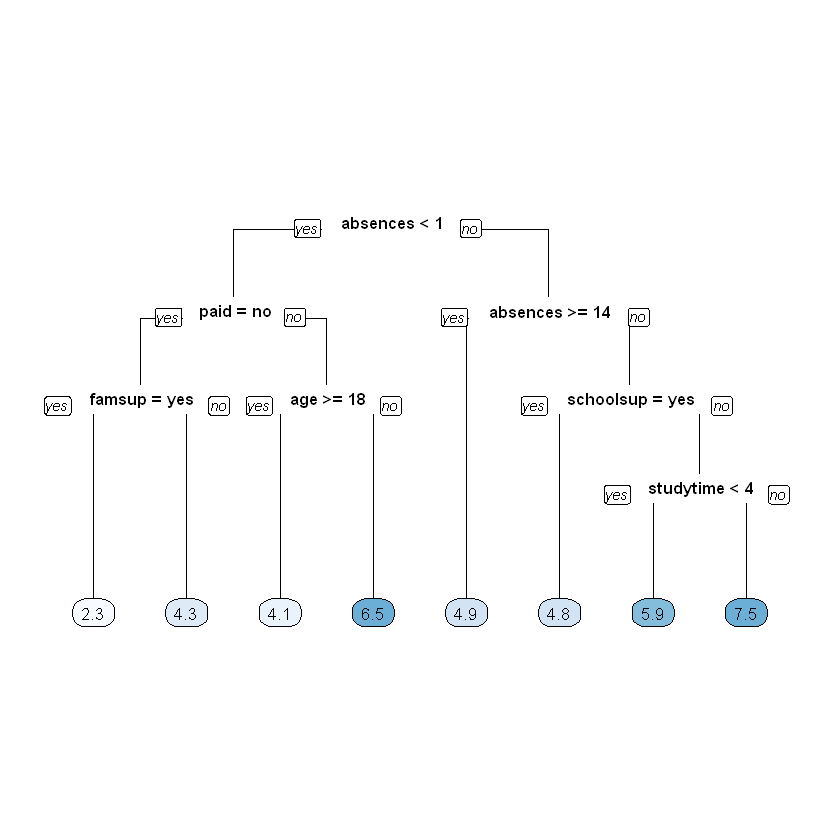

In [15]:
# Plot the tree model
rpart.plot(x = grade_model, yesno = 2, type = 0, extra = 0)


In [16]:
# EVALUATING MODEL
install.packages("Metrics")
library(Metrics)


# Compute the RMSE
rmse(actual = grade_test$final_grade, 
     predicted = pred)

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\Rtmpyykm62\downloaded_packages


Warning message:
"package 'Metrics' was built under R version 3.6.3"
Attaching package: 'Metrics'

The following objects are masked from 'package:caret':

    precision, recall



ERROR: Error in se(actual, predicted): object 'pred' not found


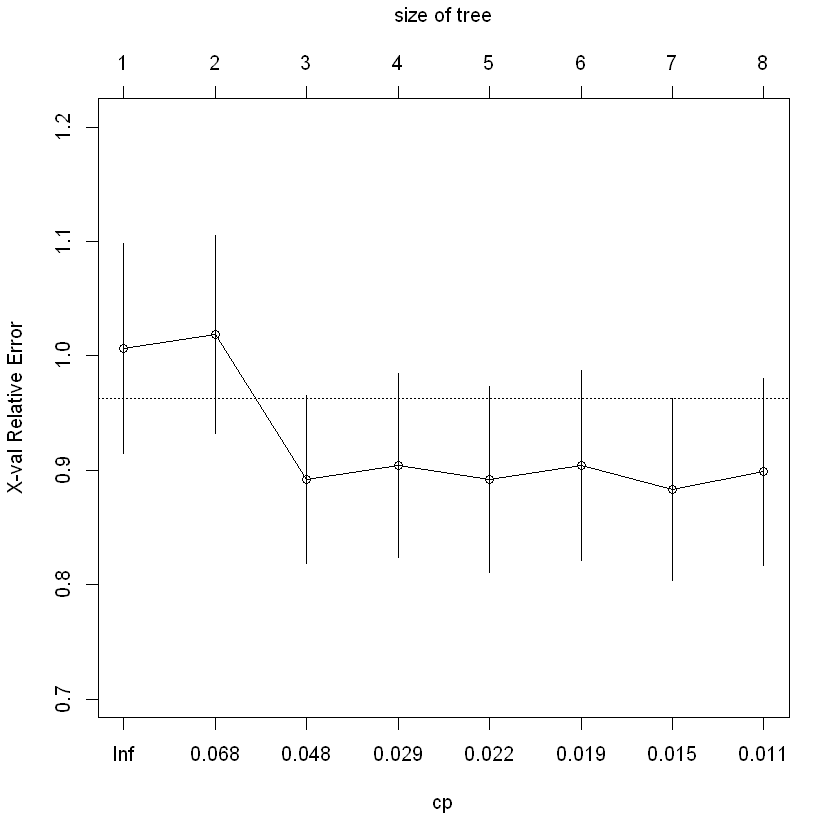

In [17]:
# Hyperparameters for tree
# rpart.control? for what you can tweak
# minsplit minimum number of datapoints reqired to split
# cp complexity parameter penalty term to control tree size can see cross validated error (you want minimixed x error)
# then use prune to trim tree using that minimised x value
# max depth depth of tree

# Plot the "CP Table"
plotcp(grade_model)

In [18]:
# Print the "CP Table"
print(grade_model$cptable)


          CP nsplit rel error    xerror       xstd
1 0.06839852      0 1.0000000 1.0066743 0.09169976
2 0.06726713      1 0.9316015 1.0185398 0.08663026
3 0.03462630      2 0.8643344 0.8923588 0.07351895
4 0.02508343      3 0.8297080 0.9046335 0.08045100
5 0.01995676      4 0.8046246 0.8920489 0.08153881
6 0.01817661      5 0.7846679 0.9042142 0.08283114
7 0.01203879      6 0.7664912 0.8833557 0.07945742
8 0.01000000      7 0.7544525 0.8987112 0.08200148


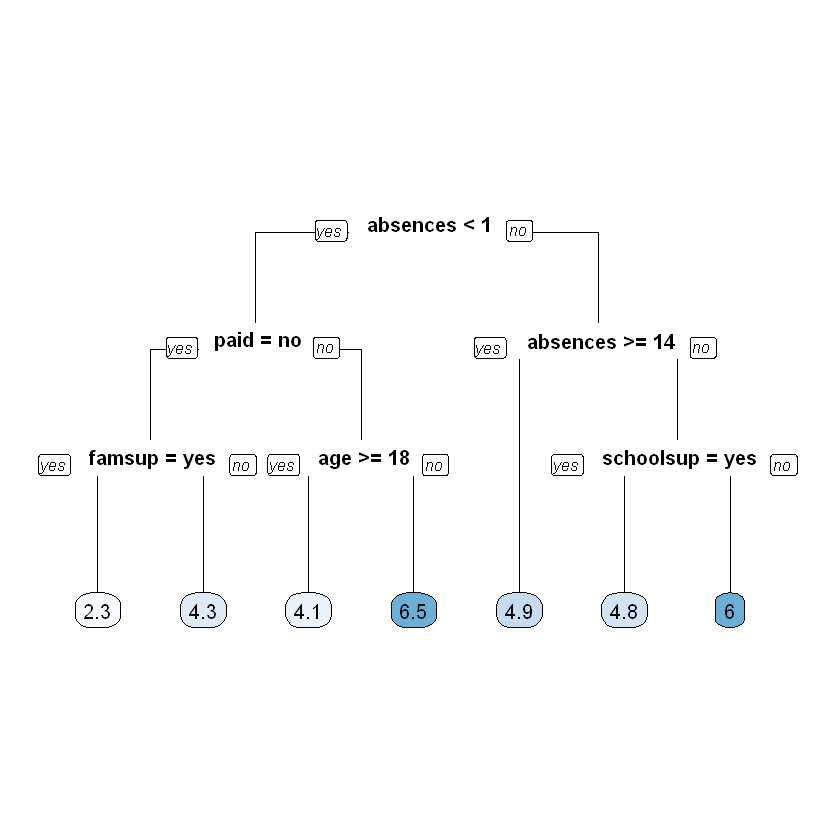

In [19]:
# Retrieve optimal cp value based on cross-validated error
opt_index <- which.min(grade_model$cptable[, "xerror"])
cp_opt <- grade_model$cptable[opt_index, "CP"]

# Prune the model (to optimized cp value)
grade_model_opt <- prune(tree = grade_model, 
                         cp = cp_opt)

# Plot the optimized model
rpart.plot(x = grade_model_opt, yesno = 2, type = 0, extra = 0)


In [20]:
# HYPER PERAMETER SELECTION!
# Grid search for model selection
# Establish a list of possible values for minsplit and maxdepth
minsplit <- seq(1, 4, 1)
maxdepth <- seq(1, 6, 1)

# Create a data frame containing all combinations 
hyper_grid <- expand.grid(minsplit = minsplit, maxdepth = maxdepth)

# Check out the grid
head(hyper_grid)

minsplit,maxdepth
1,1
2,1
3,1
4,1
1,2
2,2


In [21]:
# Print the number of grid combinations
nrow(hyper_grid)

# Number of potential models in the grid
num_models <- nrow(hyper_grid)

# Create an empty list to store models
grade_models <- list()

# Write a loop over the rows of hyper_grid to train the grid of models
for (i in 1:num_models) {
  
  # Get minsplit, maxdepth values at row i
  minsplit <- hyper_grid$minsplit[i]
  maxdepth <- hyper_grid$maxdepth[i]
  
  # Train a model and store in the list
  grade_models[[i]] <- rpart(formula = final_grade ~ ., 
                             data = grade_train, 
                             method = "anova",
                             minsplit = minsplit,
                             maxdepth = maxdepth)
}


[1] 24

In [26]:
# Number of potential models in the grid
num_models <- length(grade_models)

# Create an empty vector to store RMSE values
rmse_values <- c()

# Write a loop over the models to compute validation RMSE
for (i in 1:num_models) {
  
  # Retrieve the i^th model from the list
  model <- grade_models[[i]]
  
  # Generate predictions on grade_valid 
  pred <- predict(object = model,
                  newdata = grade_valid)
  
  # Compute validation RMSE and add to the 
  rmse_values[i] <- rmse(actual = grade_valid$final_grade, 
                         predicted = pred)
}


In [30]:
# Identify the model with smallest validation set RMSE
best_model <- grade_models[[which.min(rmse_values)]]

# Print the model paramters of the best model
best_model$control

# Compute test set RMSE on best_model
pred_dt <- predict(object = best_model,
                newdata = grade_test)
rmse(actual = grade_test$final_grade, 
     predicted = pred)

$minsplit
[1] 2

$minbucket
[1] 1

$cp
[1] 0.01

$maxcompete
[1] 4

$maxsurrogate
[1] 5

$usesurrogate
[1] 2

$surrogatestyle
[1] 0

$maxdepth
[1] 1

$xval
[1] 10

Warning message in actual - predicted:
"longer object length is not a multiple of shorter object length"

[1] 2.559899

# Bagged Trees

In [31]:
# BAGGED TREES
# AVERAGING MANY TREES TO REDUCE VARIANCE 
# ENSEMBLE METHOD CAN BE USED WITH OTHER METHODS
# BOOT STRAP AGGREGATING
# sampling rows from training set at random with replacement (can draw more than once a row)
# get samples run model on the samples from trining dataset and then average them 
# use Ipred package
install.packages("ipred")
library(ipred)

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ipred' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'ipred'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\ipred\libs\x64\ipred.dll to C:\Users\blake\Documents\R\win-library\3.6\ipred\libs\x64\ipred.dll: Permission denied"Warning message:
"restored 'ipred'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\Rtmpyykm62\downloaded_packages


Warning message:
"package 'ipred' was built under R version 3.6.3"

In [32]:
# we will go back to credit dataset (df)
# Bagging is a randomized model, so let's set a seed for reproducibility
set.seed(123)

# Train a bagged model
credit_model <- bagging(formula = default ~ ., 
                        data = train_df, # use credit default prediction dataset
                        coob = TRUE)

# Print the model
print(credit_model)


Bagging classification trees with 25 bootstrap replications 

Call: bagging.data.frame(formula = default ~ ., data = train_df, coob = TRUE)

Out-of-bag estimate of misclassification error:  0.2725 



In [33]:
# Evaluating models
# Generate predicted classes using the model object
class_prediction <- predict(object = credit_model, 
                            newdata = test_df,  
                            type = "class")         # return classification labels

# Print the predicted classes
print(class_prediction)

  [1] yes yes yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  yes
 [19] no  yes no  no  no  no  no  no  yes no  no  yes yes yes no  no  yes no 
 [37] no  no  no  yes no  no  yes no  no  no  no  no  no  no  no  no  no  no 
 [55] yes no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no  no 
 [73] no  no  no  no  no  no  no  no  no  no  no  yes yes no  no  no  no  no 
 [91] no  yes no  no  no  no  no  yes no  no  no  no  no  yes yes no  no  no 
[109] yes no  yes no  no  no  no  no  yes no  no  no  no  no  no  no  yes no 
[127] yes no  no  no  no  no  no  yes no  no  yes yes no  no  no  no  no  no 
[145] no  yes no  no  no  no  yes yes yes no  yes no  no  yes no  yes no  no 
[163] no  no  no  no  no  yes yes no  yes no  no  no  no  yes no  no  no  no 
[181] no  no  no  no  yes no  no  yes no  no  yes yes no  no  yes no  no  no 
[199] no  no 
Levels: no yes


In [34]:
# Calculate the confusion matrix for the test set caret package
confusionMatrix(data = class_prediction,         
                reference = test_df$default)  


Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  125  32
       yes  14  29
                                          
               Accuracy : 0.77            
                 95% CI : (0.7054, 0.8264)
    No Information Rate : 0.695           
    P-Value [Acc > NIR] : 0.01150         
                                          
                  Kappa : 0.4085          
                                          
 Mcnemar's Test P-Value : 0.01219         
                                          
            Sensitivity : 0.8993          
            Specificity : 0.4754          
         Pos Pred Value : 0.7962          
         Neg Pred Value : 0.6744          
             Prevalence : 0.6950          
         Detection Rate : 0.6250          
   Detection Prevalence : 0.7850          
      Balanced Accuracy : 0.6873          
                                          
       'Positive' Class : no              
                              

In [35]:
# Generate predictions on the test set
pred_bag <- predict(object = credit_model, 
                newdata = test_df,
                type = "prob")

# `pred` is a matrix
class(pred)

[1] "numeric"

In [36]:
# Look at the pred format
head(pred)       

# Compute the AUC (`actual` must be a binary vector) metric package
auc(actual = ifelse(test_df$default == "yes", 1, 0), 
    predicted = pred[,"yes"])   


4        6        7       18       21       29 
5.940945 5.940945 3.750000 4.847826 6.000000 4.847826

ERROR: Error in pred[, "yes"]: incorrect number of dimensions


In [37]:
# CROSS VALIDATION WITH CARET (Previously using one train and test set)
# now use different train and test sets using cross validation
# Specify the training configuration
ctrl <- trainControl(method = "cv",     # Cross-validation
                     number = 5,        # 5 folds
                     classProbs = TRUE,                  # For AUC
                     summaryFunction = twoClassSummary)  # For AUC

# Cross validate the credit model using "treebag" method; 
# Track AUC (Area under the ROC curve)
set.seed(1)  # for reproducibility
credit_caret_model <- train(default ~ ., 
                            data = train_df, 
                            method = "treebag",
                            metric = "ROC",
                            trControl = ctrl)

# Look at the model object
print(credit_caret_model)

Bagged CART 

800 samples
 16 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 639, 641 
Resampling results:

  ROC        Sens       Spec     
  0.7431945  0.8520386  0.4728723



In [38]:
# Inspect the contents of the model list 
names(credit_caret_model)

# Print the CV AUC
credit_caret_model$results[,"ROC"]

[1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      
[21] "terms"        "coefnames"    "contrasts"    "xlevels"

[1] 0.7431945

In [39]:
# Generate predictions on the test set
pred_bag2 <- predict(object = credit_caret_model, 
                newdata = test_df,
                type = "prob")

# Compute the AUC (`actual` must be a binary (or 1/0 numeric) vector)
auc(actual = ifelse(test_df$default == "yes", 1, 0), 
    predicted = pred[,"yes"])

# Print ipred::bagging test set AUC estimate
print(credit_model)  # without cross val

ERROR: Error in pred[, "yes"]: incorrect number of dimensions


In [40]:
# Print ipred::bagging test set AUC estimate
print(credit_model)  # without cross val

# Print caret "treebag" test set AUC estimate
print(credit_caret_model) #with cross val



Bagging classification trees with 25 bootstrap replications 

Call: bagging.data.frame(formula = default ~ ., data = train_df, coob = TRUE)

Out-of-bag estimate of misclassification error:  0.2725 

Bagged CART 

800 samples
 16 predictor
  2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 639, 641 
Resampling results:

  ROC        Sens       Spec     
  0.7431945  0.8520386  0.4728723



In [41]:
# Compare to caret 5-fold cross-validated AUC
credit_caret_model$results[,"ROC"]


[1] 0.7431945

# Random Forest!

In [42]:
# RANDOM FOREST!!!!!!!!!
# Can be classification or Regression
# Similar to bagging but sample subset of the features ((featurebagging))
#better performance
# adds to decorrelation between samples
install.packages("randomForest")
library(randomForest)


Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\blake\Documents\R\win-library\3.6\00LOCK\randomForest\libs\x64\randomForest.dll to C:\Users\blake\Documents\R\win-library\3.6\randomForest\libs\x64\randomForest.dll: Permission denied"Warning message:
"restored 'randomForest'"


The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\Rtmpyykm62\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 3.6.3"randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [43]:
# Train a Random Forest
set.seed(1)  # for reproducibility
credit_model <- randomForest(formula = default ~ ., 
                             data = train_df)

# Print the model output                             
print(credit_model)


Call:
 randomForest(formula = default ~ ., data = train_df) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 23%
Confusion matrix:
     no yes class.error
no  510  51  0.09090909
yes 133 106  0.55648536


OOB,no,yes
0.2926829,0.2171717,0.4606742
0.2974138,0.2129630,0.4928571
0.3080808,0.1971154,0.5674157
0.3087149,0.1910828,0.5776699
0.3113855,0.1916996,0.5829596
0.2959049,0.1799242,0.5633188


 OOB 
0.23 


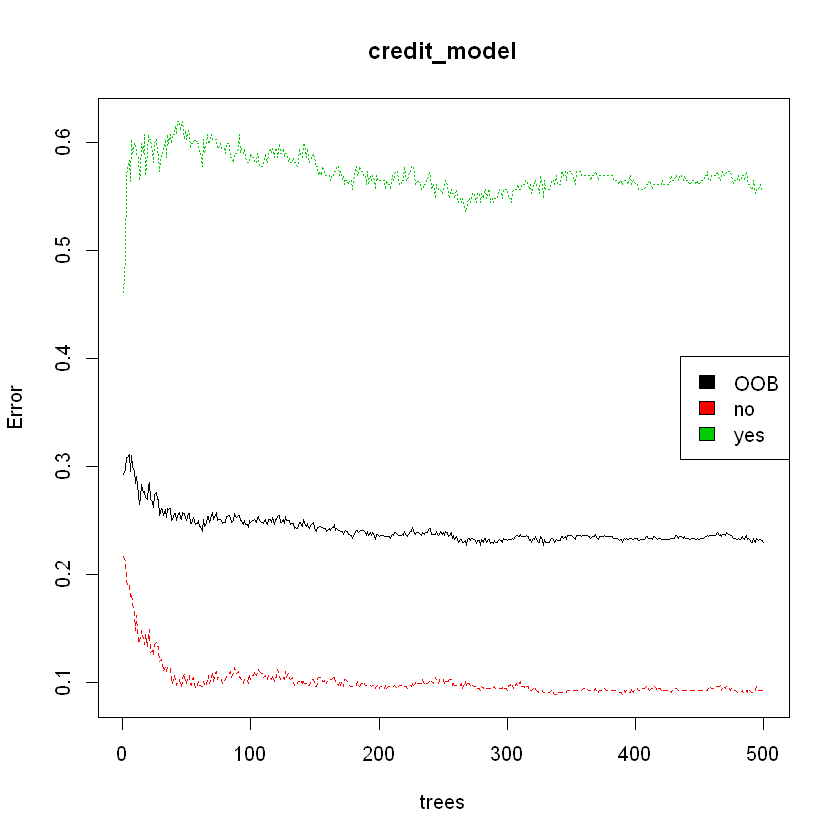

In [46]:
# Model Assesment
# out of bag samples can be grabed
err <- credit_model$err.rate
head(err)

# oob error estimate final error (same as model output)
oob_err <- err[nrow(err), "OOB"]
print(oob_err)

# Plot the model trained in the previous exercise
plot(credit_model)
# Add a legend since it doesn't have one by default
legend(x = "right", 
       legend = colnames(err),
       fill = 1:ncol(err))


In [47]:
# Generate predicted classes using the model object
class_prediction <- predict(object = credit_model,  # model object 
                            newdata = test_df,  # test dataset
                            type = "class")         # return classification labels

# Calculate the confusion matrix for the test set
cm <- confusionMatrix(data = class_prediction,          # predicted classes
                      reference = test_df$default)  # actual classes
print(cm)


Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  130  41
       yes   9  20
                                         
               Accuracy : 0.75           
                 95% CI : (0.684, 0.8084)
    No Information Rate : 0.695          
    P-Value [Acc > NIR] : 0.05147        
                                         
                  Kappa : 0.3085         
                                         
 Mcnemar's Test P-Value : 1.165e-05      
                                         
            Sensitivity : 0.9353         
            Specificity : 0.3279         
         Pos Pred Value : 0.7602         
         Neg Pred Value : 0.6897         
             Prevalence : 0.6950         
         Detection Rate : 0.6500         
   Detection Prevalence : 0.8550         
      Balanced Accuracy : 0.6316         
                                         
       'Positive' Class : no             
                                         


In [48]:
# Compare test set accuracy to OOB accuracy
paste0("Test Accuracy: ", cm$overall[1])
paste0("OOB Accuracy: ", 1 - oob_err)

# Random forest has built in out of bag and validation code
# cant accurately compare performance against other types of models


[1] "Test Accuracy: 0.75"

[1] "OOB Accuracy: 0.77"

In [49]:
# Generate predictions on the test set
pred_rf <- predict(object = credit_model, 
                newdata = test_df,
                type = "prob")

# `pred` is a matrix
class(pred)

# Look at the pred format
head(pred)                

[1] "numeric"

4        6        7       18       21       29 
5.940945 5.940945 3.750000 4.847826 6.000000 4.847826

In [50]:
# Compute the AUC (`actual` must be a binary 1/0 numeric vector)
auc(actual = ifelse(test_df$default == "yes", 1, 0), 
    predicted = pred[,"yes"])                


ERROR: Error in pred[, "yes"]: incorrect number of dimensions


mtry = 4  OOB error = 23% 
Searching left ...
mtry = 2 	OOB error = 23.88% 
-0.03804348 0.05 
Searching right ...
mtry = 8 	OOB error = 24.38% 
-0.05978261 0.05 


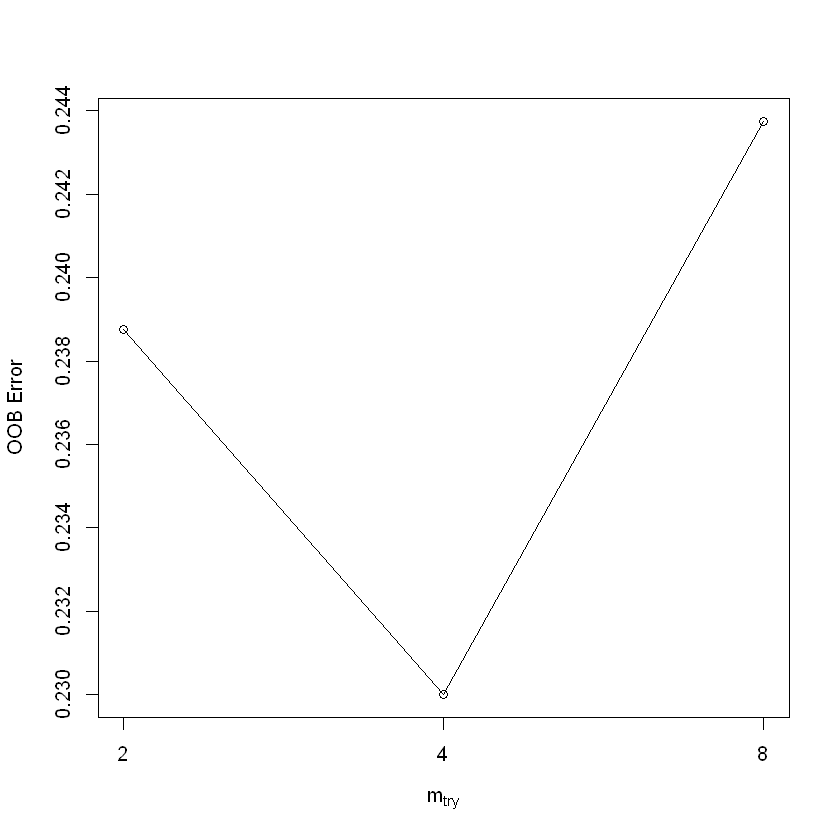

In [51]:
#tuning a RF model 
# n trees default 500 trees
# mtry number of variables randomly sampled as candidates at each split
# sampsize number of samples to train on
# node size a and max node minimum size and maximum number of terminal noedes
#tuneRF to tune mtry
# Execute the tuning process
set.seed(1)              
res <- tuneRF(x = subset(train_df, select = -default),
              y = train_df$default,
              ntreeTry = 500)

In [52]:
# Look at results
print(res)

      mtry OOBError
2.OOB    2  0.23875
4.OOB    4  0.23000
8.OOB    8  0.24375


In [53]:
# Find the mtry value that minimizes OOB Error
mtry_opt <- res[,"mtry"][which.min(res[,"OOBError"])]
print(mtry_opt)

4.OOB 
    4 


In [54]:
# If you just want to return the best RF model (rather than results)
# you can set `doBest = TRUE` in `tuneRF()` to return the best RF model
# instead of a set performance matrix.

# Establish a list of possible values for mtry, nodesize and sampsize
mtry <- seq(4, ncol(train_df) * 0.8, 2)
nodesize <- seq(3, 8, 2)
sampsize <- nrow(train_df) * c(0.7, 0.8)

In [55]:
# Create a data frame containing all combinations 
hyper_grid <- expand.grid(mtry = mtry, nodesize = nodesize, sampsize = sampsize)

# Create an empty vector to store OOB error values
oob_err <- c()

# Write a loop over the rows of hyper_grid to train the grid of models
for (i in 1:nrow(hyper_grid)) {
  
  # Train a Random Forest model
  model <- randomForest(formula = default ~ ., 
                        data = train_df,
                        mtry = hyper_grid$mtry[i],
                        nodesize = hyper_grid$nodesize[i],
                        sampsize = hyper_grid$sampsize[i])
  
  # Store OOB error for the model                      
  oob_err[i] <- model$err.rate[nrow(model$err.rate), "OOB"]
}


# BOOSTING

In [57]:
#BOOSTING
# adaboost desicion tree where every observation has equal weight
# increase/lower weiight of observations difficult to classify
# second tree is grown on weighted data
# new model tree plus tree 2
# classification error from new 2 tree ensemble method 
# grow 3rd tree to predict revised residual 
# repeat for number of iterations
# The prediciton for GBM is a weighted sum of the preditions made from previous tree models 
# GBM can defined an optimized cost function
# GBM can be prone to overfitting (use early stooping)
# Identify optimal set of hyperparmeters based on OOB error
install.packages("gbm")
library(gbm)


Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'gbm' is in use and will not be installed"

In [58]:
# Convert "yes" to 1, "no" to 0
train_df$default <- ifelse(train_df$default == "yes", 1, 0)

# Train a 10000-tree GBM model
set.seed(1)
credit_model <- gbm(formula = default ~ ., 
                    distribution = "bernoulli", 
                    data = train_df,
                    n.trees = 10000)

# Print the model object                    
print(credit_model) 

gbm(formula = default ~ ., distribution = "bernoulli", data = train_df, 
    n.trees = 10000)
A gradient boosted model with bernoulli loss function.
10000 iterations were performed.
There were 16 predictors of which 16 had non-zero influence.


,var,rel.inf
amount,amount,20.3744628
age,age,14.3076569
credit_history,credit_history,13.0742754
purpose,purpose,10.6344558
employment_duration,employment_duration,8.8072767
ï..checking_balance,ï..checking_balance,6.2341339
months_loan_duration,months_loan_duration,5.5078889
savings_balance,savings_balance,4.5756686
other_credit,other_credit,4.4565463
job,job,3.2104060


  mtry nodesize sampsize
6    4        5      560


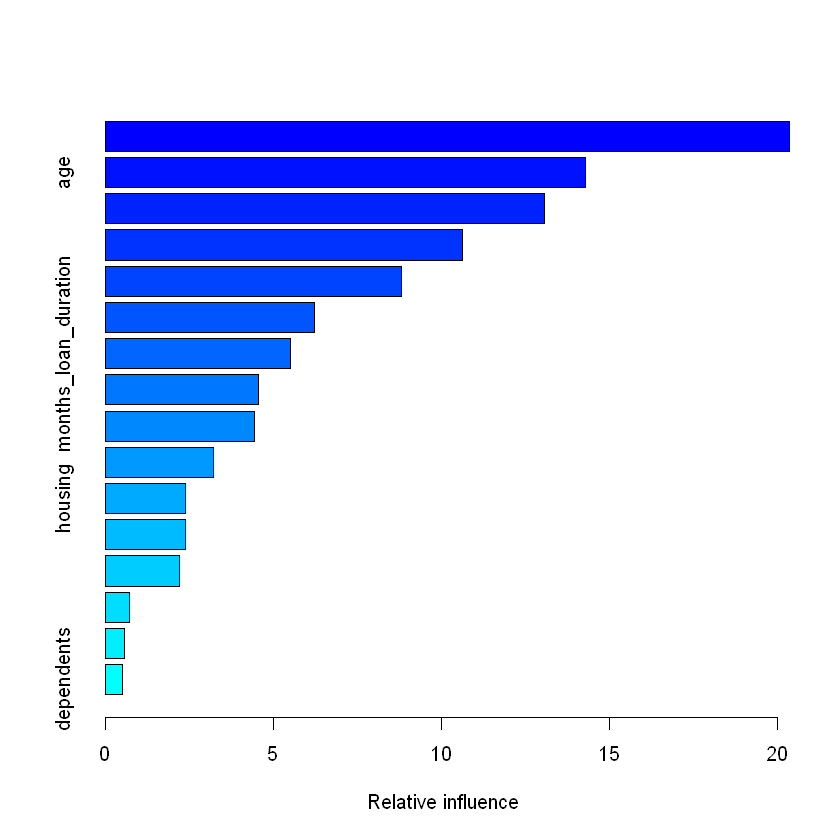

In [59]:
# summary() prints variable importance
summary(credit_model)  
opt_i <- which.min(oob_err)
print(hyper_grid[opt_i,])

In [60]:
# GBM evaluation
# Since we converted the training response col, let's also convert the test response col
test_df$default <- ifelse(test_df$default == "yes", 1, 0)


In [61]:
# Generate predictions on the test set
pred_gbm1 <- predict(object = credit_model, 
                  newdata = test_df,
                  n.trees = 10000)

# Generate predictions on the test set (scale to response)
pred_gbm2 <- predict(object = credit_model, 
                  newdata = test_df,
                  n.trees = 10000,
                  type = "response")

# Compare the range of the two sets of predictions
range(pred_gmb1)
range(pred_gbm2)

ERROR: Error in eval(expr, envir, enclos): object 'pred_gmb1' not found


In [62]:
# Generate the test set AUCs using the two sets of preditions & compare
auc(actual = test_df$default, predicted = pred_gbm1)  #default
auc(actual = test_df$default, predicted = pred_gbm2)  #rescaled


[1] 0.7338129

[1] 0.7338129

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.


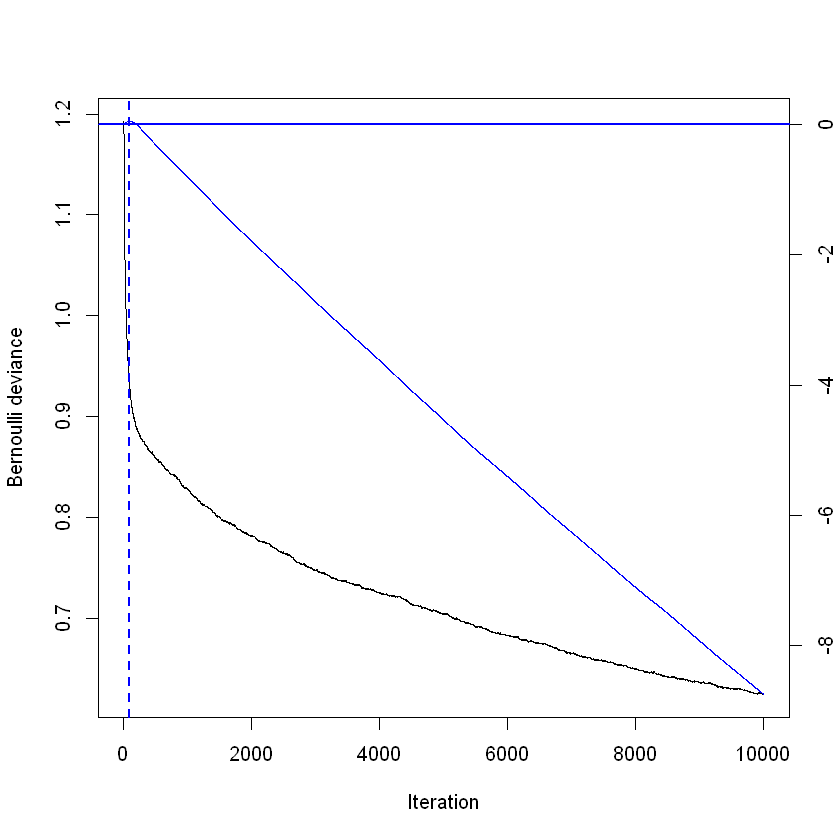

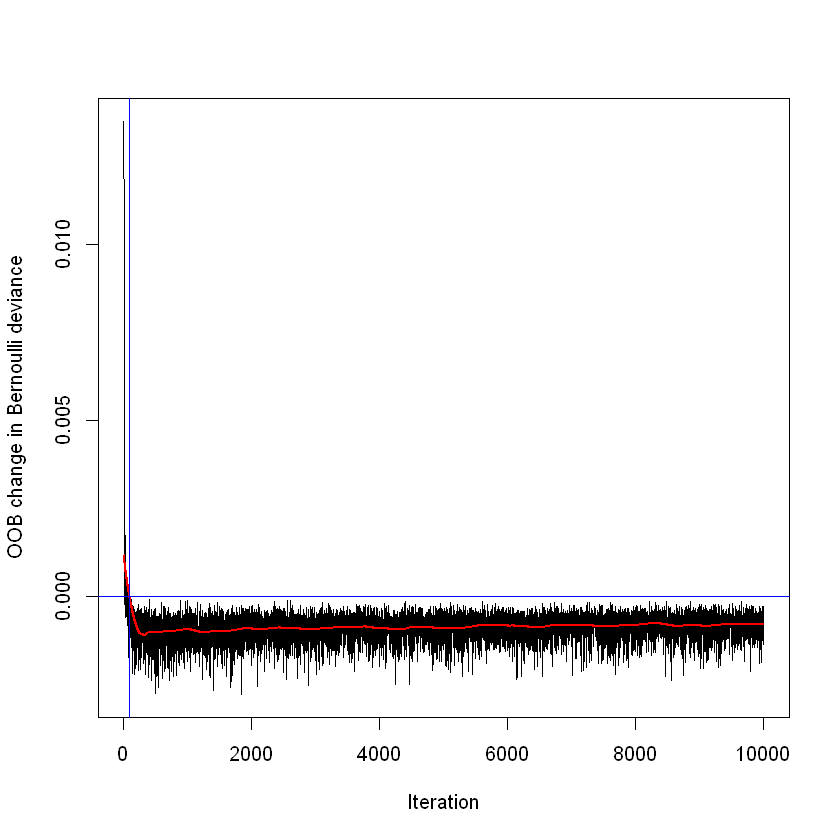

[1] "Optimal n.trees (OOB Estimate): 91"
[1] "Optimal n.trees (CV Estimate): 47"


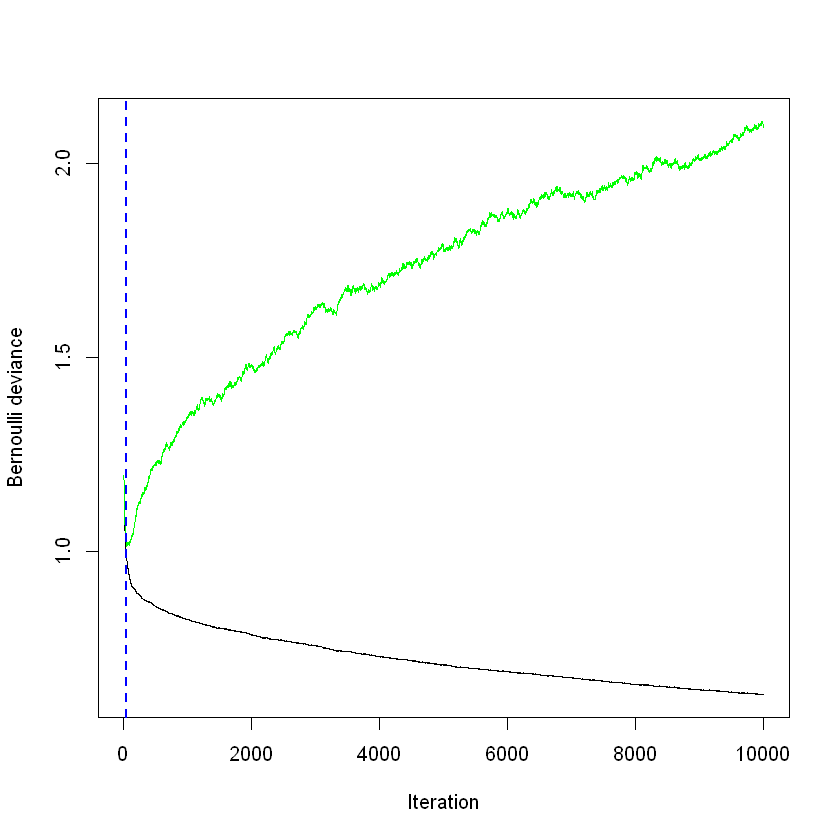

In [63]:
# Hyper perameters tuning
# Optimal ntree estimate based on OOB
ntree_opt_oob <- gbm.perf(object = credit_model, 
                          method = "OOB", 
                          oobag.curve = TRUE)
# Train a CV GBM model
set.seed(1)
credit_model_cv <- gbm(formula = default ~ ., 
                       distribution = "bernoulli", 
                       data = train_df,
                       n.trees = 10000,
                       cv.folds = 2)

# Optimal ntree estimate based on CV
ntree_opt_cv <- gbm.perf(object = credit_model_cv, 
                         method = "cv")

# Compare the estimates                         
print(paste0("Optimal n.trees (OOB Estimate): ", ntree_opt_oob))                         
print(paste0("Optimal n.trees (CV Estimate): ", ntree_opt_cv))


In [64]:
# Generate predictions on the test set using ntree_opt_oob number of trees
gbm_pred0 <- predict(object = credit_model, 
                  newdata = test_df,
                  n.trees = ntree_opt_oob)

# Generate predictions on the test set using ntree_opt_cv number of trees
gbm_pred1 <- predict(object = credit_model, 
                  newdata = test_df,
                  n.trees = ntree_opt_cv)   

# Generate the test set AUCs using the two sets of preditions & compare
auc1 <- auc(actual = test_df$default, predicted = gbm_pred0)  #OOB
auc2 <- auc(actual = test_df$default, predicted = gbm_pred1)  #CV 

# Compare AUC 
print(paste0("Test set AUC (OOB): ", auc1))                         
print(paste0("Test set AUC (CV): ", auc2))


[1] "Test set AUC (OOB): 0.737528010378582"
[1] "Test set AUC (CV): 0.727326335652789"


In [66]:
# Generate the test set AUCs using the two sets of predictions & compare
actual <- test_df$default
dt_auc <- auc(actual = actual, predicted = pred_dt1)
bag_auc <- auc(actual = actual, predicted = pred_bag2)
rf_auc <- auc(actual = actual, predicted = pred_rf)
gbm_auc <- auc(actual = actual, predicted = gbm_pred1)


Warning message in auc(actual = actual, predicted = pred_bag):
"longer object length is not a multiple of shorter object length"Warning message in auc(actual = actual, predicted = pred_rf):
"longer object length is not a multiple of shorter object length"

In [68]:
# Print results
sprintf("Decision Tree Test AUC: %.3f", dt_auc)
sprintf("Bagged Trees Test AUC: %.3f", bag_auc)

# List of predictions
preds_list <- list(pred_bag2, gbm_pred1)

# List of actual values (same for all)
m <- length(preds_list)
actuals_list <- rep(list(test_df$default), m)

install.packages("ROCR")
library(ROCR)
# Plot the ROC curves
pred <- prediction(preds_list, actuals_list)
rocs <- performance(pred, "tpr", "fpr")
plot(rocs, col = as.list(1:m), main = "Test Set ROC Curves")
legend(x = "bottomright", 
       legend = c( "Bagged Trees", "GBM"),
       fill = 1:m)


[1] "Decision Tree Test AUC: 0.581"

[1] "Bagged Trees Test AUC: 2.662"

Installing package into 'C:/Users/blake/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\blake\AppData\Local\Temp\Rtmpyykm62\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 3.6.3"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.3"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



ERROR: Error in prediction(preds_list, actuals_list): Number of predictions in each run must be equal to the number of labels for each run.
